# J = 1 to 2 parameter scans - plots
Making plots for the data for the first step of SPA

## Import packages

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
import seaborn as sns
import uncertainties as uc
from uncertainties import ufloat
from uncertainties import unumpy as unp

## Set plot parameters

In [6]:
plt.style.use(['seaborn-deep'])
# plt.style.use(['fivethirtyeight'])


# Font for labels
plt.rcParams['font.family'] = 'serif'

# Linewidths for plots
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['lines.marker'] = 'x'

# Axes
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True


# Ticks
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Legend
plt.rcParams['legend.fontsize'] = 16

## Save folder

In [7]:
SAVE_DIR = "./saved_figs/J12/"

## Frequency scans
Start by getting data from file

In [8]:
# fname = ('G:\My Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
#          '\SPA_test_11_9_2021_analyzed.hdf')

fname = ('D:\Google Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
         '\SPA_test_11_9_2021_analyzed.hdf')

# Data for SPA1
run_name_freq_R0F2 = "1636486496 Scan SPA J = 0 to 1 microwave frequency"
df_freq_R0F2_SPA1 = pd.read_hdf(fname, run_name_freq_R0F2)

run_name_freq_R1F3_SPA1 = "1636493528 Accumulation on R(1), F = 3, SPA J = 0 to 1 microwave frequency scan"
df_freq_R1F3_SPA1 = pd.read_hdf(fname, run_name_freq_R1F3_SPA1)

# Data for SPA2
run_name_freq_R1F3 = "1636497469 Depletion on R(1), F = 3, SPA J = 1 to 2 microwave frequency scan"
df_freq_R1F3 = pd.read_hdf(fname, run_name_freq_R1F3)

run_name_freq_R2F4 = "1636503922 Accumulation on R(2), F = 4, SPA J = 1 to 2 microwave frequency scan"
df_freq_R2F4 = pd.read_hdf(fname, run_name_freq_R2F4)

### SPA2 efficiency vs frequency

In [133]:
# Define signal sizes

# SPA1
# Figure out which index corresponds to 13342 MHz for the SPA1 tests
idx = (df_freq_R0F2_SPA1.SPAJ01Frequency/1e6 - 13342).tolist().index(0.)

S_0_ON = ufloat(df_freq_R0F2_SPA1.IntegratedFluorescence_ON[idx],
                    df_freq_R0F2_SPA1.IntegratedFluorescence_ON_err[idx])
S_0_OFF = ufloat(df_freq_R0F2_SPA1.IntegratedFluorescence_OFF[idx],
                     df_freq_R0F2_SPA1.IntegratedFluorescence_OFF_err[idx])
S_1_ON = ufloat(df_freq_R1F3_SPA1.IntegratedFluorescence[idx],
                    df_freq_R1F3_SPA1.IntegratedFluorescence_err[idx])
S_1_OFF = ufloat(np.mean(df_freq_R1F3_SPA1[:1].IntegratedFluorescence), 
                 np.sqrt(np.sum(df_freq_R1F3_SPA1[:1].IntegratedFluorescence_err**2))/1)

# SPA2
Σ_1_ON = unp.uarray(df_freq_R1F3.IntegratedFluorescence_ON[1:],df_freq_R1F3.IntegratedFluorescence_ON_err[1:])
# Σ_1_OFF = unp.uarray(df_freq_R1F3.IntegratedFluorescence_OFF[1:],df_freq_R1F3.IntegratedFluorescence_OFF_err[1:])
Σ_1_OFF = ufloat(np.mean(df_freq_R1F3[:].IntegratedFluorescence_OFF), 
                 sem(df_freq_R1F3[:].IntegratedFluorescence_OFF_err))
# Σ_1_OFF = S_1_ON
Σ_2_ON = unp.uarray(df_freq_R2F4.IntegratedFluorescence[:28],df_freq_R2F4.IntegratedFluorescence_err[:28])
Σ_2_OFF = ufloat(np.mean(df_freq_R2F4[-4:].IntegratedFluorescence), 
                 np.sqrt(np.sum(df_freq_R2F4[-4:].IntegratedFluorescence_err**2))/2)

# Numbers of photons per molecule for each transition
n_gamma_0 = 1.92
n_gamma_1 = 2.10
n_gamma_2 = 2.13

# Calculate efficiency based on depletion for SPA1
e01_dep = (1 - S_0_ON/S_0_OFF)/(1 - 3*n_gamma_0*S_1_OFF/(5*n_gamma_1*S_0_OFF))

# Calculate efficiency based on accumulation for SPA1
e01_acc = 5/3 * (S_1_ON/S_1_OFF-1)/(5*n_gamma_1*S_0_OFF/(3*n_gamma_0*S_1_OFF) - 1)

# Calculate efficiency based on depletion for SPA2
e01 = e01_acc
# e01 = e01_dep
# e01 = 0.75

S_1_ON = Σ_1_OFF

e12_dep = (
    7*n_gamma_2
       *(5*e01*n_gamma_1*S_0_OFF + 5*n_gamma_0*S_1_OFF - 3*e01*n_gamma_0*S_1_OFF - 5*n_gamma_0*Σ_1_ON)
    /(7*n_gamma_2*(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF)
       - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

e12_dep_alt = (7*n_gamma_0*n_gamma_2*(3*e01-5)*(Σ_1_OFF - Σ_1_ON)
               / (7*n_gamma_2*(-2*e01*n_gamma_1*S_0_OFF + 3*(-1+e01)*n_gamma_0*Σ_1_OFF) + 3*(5-3*e01)*n_gamma_0*n_gamma_1*Σ_2_OFF))

e12_acc = (
    35*n_gamma_0*n_gamma_1*(Σ_2_ON - Σ_2_OFF)
    /(7*n_gamma_2
      *(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF) - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

e12_dep_signal_sizes_acc = (35*n_gamma_2*(Σ_1_ON - Σ_1_OFF)/(7*n_gamma_2*(2*S_1_OFF - 5*Σ_1_OFF) + 15*n_gamma_1*Σ_2_OFF))

In [134]:
num = (35*n_gamma_2*(Σ_1_ON - Σ_1_OFF))
unp.std_devs(num)/unp.nominal_values(num)

array([ 1.31425136e-01, -3.41861279e-01,  1.01281634e+00, -2.53344376e-01,
       -2.10598986e-01, -2.96562624e-01, -6.68950678e-02, -1.59460780e-01,
       -7.66154878e-02, -2.93285456e-02, -7.91526567e-02, -1.77511564e-02,
       -2.45838991e-02, -8.68717901e-03, -1.37355394e-02, -1.07811363e-02,
       -1.44892873e-02, -1.12134193e-02, -7.93928984e-03, -1.03279839e-02,
       -2.74314645e-01, -1.22405229e-01, -1.03080533e-01,  3.07039065e+01,
       -2.10846642e+00,  7.15575128e-01, -7.12164104e-01, -3.94333541e-01])

In [135]:
num[12].s/num[12].n

-0.02458389908108302

In [136]:
den = (7*n_gamma_2*(2*S_1_OFF - 5*Σ_1_OFF) + 15*n_gamma_1*Σ_2_OFF)
den.s/den.n

-0.008649546153219806

In [137]:
num[12]/den

0.9369485571185605+/-0.0222161899778326

In [138]:
(35*n_gamma_2*(Σ_1_ON - Σ_1_OFF)/(7*n_gamma_2*(2*S_1_OFF - 5*Σ_1_OFF) + 15*n_gamma_1*Σ_2_OFF))

array([-0.545091658258212+/-0.07220854338475007,
       0.09335812805162028+/-0.031765111035248664,
       -0.031754466646476624+/-0.03221666783717471,
       0.18465612507739532+/-0.046592193101938136,
       0.12412877026649428+/-0.025902168899370057,
       0.25479881040313057+/-0.07541102779854801,
       0.5262382982943674+/-0.034673952537686674,
       0.40779128691872996+/-0.06477828873200811,
       0.430117586903474+/-0.032444568708788125,
       0.38200597955355614+/-0.009725089911081002,
       0.659773119751962+/-0.0518409590710671,
       0.8092420998827121+/-0.012909875513722791,
       0.9369485571185605+/-0.0222161899778326,
       0.9972635735664317+/-0.006338284892964035,
       0.9736772016523568+/-0.01196199927982067,
       0.9908262268318844+/-0.008886916881715395,
       0.9639047737510519+/-0.012607049924116456,
       0.9781218571463838+/-0.009202554016179337,
       0.9762852792573092+/-0.004939524107759102,
       0.760527356239164+/-0.004650377474710382,
   

In [139]:
S_1_ON

19121.896495114932+/-127.12426486652527

In [140]:
Σ_1_OFF

19121.896495114932+/-127.12426486652527

In [141]:
Σ_2_ON

array([2741.9902800170926+/-132.98607867292705,
       2884.7582093063706+/-155.74404115401254,
       2878.5816606220396+/-154.35657565717256,
       3428.205649338682+/-181.93571842100386,
       3610.345574778371+/-177.36376136827403,
       4319.338968882663+/-190.84548625330424,
       6784.856876300511+/-350.8917091797228,
       6189.298995882372+/-340.0150111578605,
       5654.521313267478+/-288.9900591829968,
       5437.321256346197+/-250.7676014030883,
       5396.152592152896+/-240.87774574439803,
       6650.616466767368+/-310.1235744291365,
       10668.997475467928+/-564.3802320158605,
       16317.461609262577+/-937.9226469417896,
       18663.865610439465+/-876.0508541096624,
       19544.003996814063+/-1019.5534588643001,
       19437.544919367454+/-921.0812014704422,
       17968.38653151988+/-747.6578118671373,
       18563.613836092423+/-829.0137738022064,
       11671.551946844414+/-529.6614734202533,
       4227.4503594925245+/-192.67118861015973,
       7612.96

In [142]:
Σ_2_ON - Σ_2_OFF

array([-306.2118493184512+/-196.2721201738896,
       -163.4439200291731+/-212.35266513923148,
       -169.62046871350412+/-211.3371725119844,
       380.0035200031384+/-232.24567525385402,
       562.1434454428272+/-228.6817698975016,
       1271.136839547119+/-239.28946416424597,
       3736.6547469649677+/-379.4238258304544,
       3141.096866546828+/-369.3882183413973,
       2606.3191839319343+/-323.03668885026633,
       2389.119127010653+/-289.3472618674833,
       2347.9504628173527+/-280.81940180773597,
       3602.4143374318246+/-342.07320773988715,
       7620.795346132384+/-582.5482763917754,
       13269.259479927034+/-948.9659317820871,
       15615.663481103922+/-887.8640363383465,
       16495.80186747852+/-1029.7216631298527,
       16389.34279003191+/-932.3239929010651,
       14920.184402184335+/-761.4654632238468,
       15515.41170675688+/-841.4875430988433,
       8623.349817508872+/-548.9797122503395,
       1179.2482301569808+/-240.74807363134508,
       4564.76

In [143]:
e01

0.8193815434744899+/-0.08170899315427727

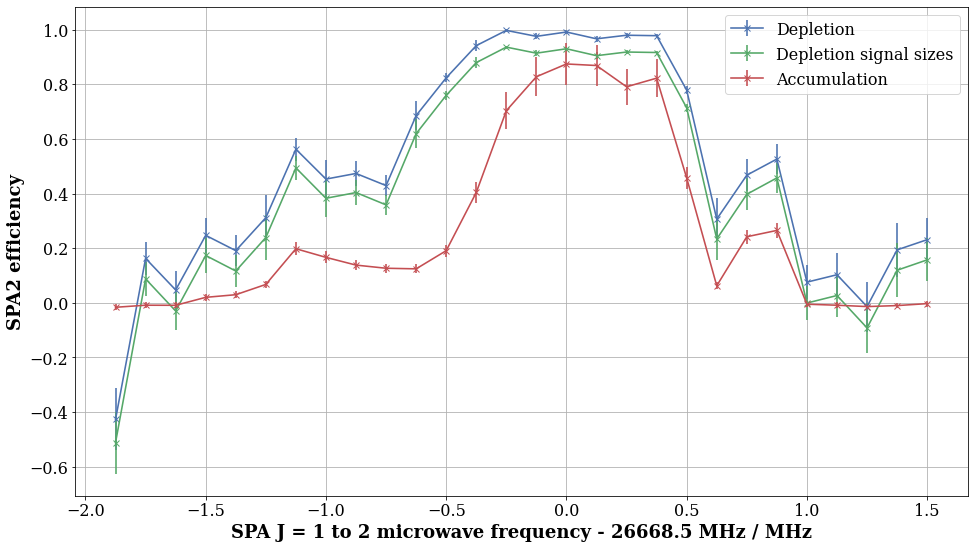

In [144]:
fig, ax = plt.subplots(figsize = (16,9))
ax.set_xlabel("SPA J = 1 to 2 microwave frequency - 26668.5 MHz / MHz")
ax.set_ylabel("SPA2 efficiency")
ax.errorbar(df_freq_R1F3.SPAJ12Frequency[1:]/1e6*2 - 26668.5, unp.nominal_values(e12_dep), 
            yerr = unp.std_devs(e12_dep), label = 'Depletion', marker = 'x')

# ax.errorbar(df_freq_R1F3.SPAJ12Frequency[1:]/1e6*2 - 26668.5, unp.nominal_values(e12_dep_alt), 
#             yerr = unp.std_devs(e12_dep), label = 'Depletion alt', marker = 'x')

ax.errorbar(df_freq_R1F3.SPAJ12Frequency[1:]/1e6*2 - 26668.5, unp.nominal_values(e12_dep_alt), 
            yerr = unp.std_devs(e12_dep), label = 'Depletion signal sizes', marker = 'x')

ax.errorbar(df_freq_R1F3.SPAJ12Frequency[1:]/1e6*2 - 26668.5, unp.nominal_values(e12_acc), 
            yerr = unp.std_devs(e12_acc), label = 'Accumulation', marker = 'x')

ax.legend()
# fig.savefig(SAVE_DIR+"J12_eff_vs_freq.pdf")

## Error propagation using bootstrap
The error bars for the depletion measurements seem too small given that choosing to use S_1_ON vs Sigma_1_OFF give fairly different results. Thus wondering if there is something weird going on with the error propagation package. Repeat error calculation using bootstrap here.


In [119]:
test = lambda x,y,z: print(f"{x},{y},{z}")
test_params = [1,2,3]
test(*test_params)

1,2,3


In [120]:
def test_func(*params, func):
    print(f"{params[0]},{params[1]},{params[2]}")
    func(*params)
    

test_func(*test_params, func = test)

1,2,3
1,2,3


0.02439337851536377

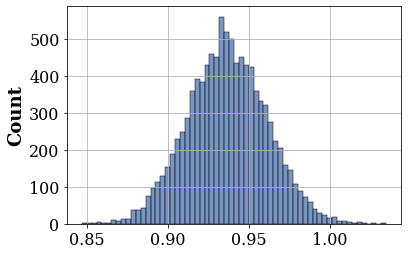

In [145]:
def bootstrap_values(*variables, expression, N_bs = 10):
    """
    Calculates mean and standard error for expression using variables
    """
    variable_values = []
    for variable in variables:
        variable_values.append(np.random.normal(variable.n, variable.s, N_bs))
        
    values = expression(*variable_values)
    
    return values
        
values = bootstrap_values(num[12], den, expression = lambda x,y: x/y, N_bs = 10000)

sns.histplot(values)

np.std(values)

0.00289428829214852

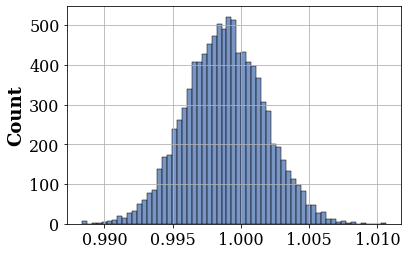

In [146]:
expression = lambda Σ_1_ON, Σ_1_OFF, S_1_OFF, Σ_2_OFF: (35*n_gamma_2*(Σ_1_ON - Σ_1_OFF)/(7*n_gamma_2*(2*S_1_OFF - 5*Σ_1_OFF) + 15*n_gamma_1*Σ_2_OFF))
expression(Σ_1_ON[12], Σ_1_OFF, S_1_OFF, Σ_2_OFF)

values = bootstrap_values(Σ_1_ON[13], ufloat(40000, 2000), S_1_OFF, Σ_2_OFF, expression = expression, N_bs = 10000)

sns.histplot(values)

np.std(values)

In [147]:
S_1_OFF

1650.4364159333252+/-116.85578939100198

In [149]:
Σ_1_ON

19121.896495114932+/-127.12426486652527

In [150]:
Σ_2_OFF

3048.2021293355438+/-144.35182034443423

In [154]:
Σ_1_ON[13]

1995.14199834747+/-77.30366457156012

In [153]:
Σ_1_ON/Σ_1_OFF

array([1.4895574783212453+/-0.06475741417879047,
       0.9161532394463962+/-0.02853982796006515,
       1.0285193074987788+/-0.02892904690401033,
       0.8341567228558846+/-0.041855166786376644,
       0.8885175239097202+/-0.02327908675809925,
       0.7711602054252672+/-0.06773322191599739,
       0.527375092966445+/-0.031107619053939606,
       0.6337546702820026+/-0.05817491401054467,
       0.6137029836432807+/-0.02912716675726079,
       0.6569129590948778+/-0.008724916157692848,
       0.4074448583527826+/-0.04650770952036271,
       0.2732038442197142+/-0.011204894439058545,
       0.15850817749552074+/-0.019618139618614704,
       0.10433808167809969+/-0.00410175489354797,
       0.12552146355904506+/-0.01003860992862366,
       0.11011958867183098+/-0.006955721884055253,
       0.13429827217087817+/-0.010674119610968705,
       0.12152963153832526+/-0.00731375281329721,
       0.12317909805738517+/-0.002221165083028631,
       0.3169555081718052+/-0.00316361299282186,
      